In [95]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
USERNAME = 'dryu'
PWD = 
DB_HOST = [('olympus','olympus.ctbsm6jecdy0.us-west-2.redshift.amazonaws.com')
           ,('atlas','atlas.ctbsm6jecdy0.us-west-2.redshift.amazonaws.com')
          ,('verizon','rr.verizon.amer-ignite.digitalturbine.com')]

In [207]:
conn_olympus = psycopg2.connect(f"user={USERNAME} password={PWD} port = 5439 "
                                f"dbname={DB_HOST[0][0]} host={DB_HOST[0][1]}")
conn_atlas = psycopg2.connect(f"user={USERNAME} password={PWD} port = 5439 "
                              f"dbname={DB_HOST[1][0]} host={DB_HOST[1][1]}")
cur_olympus = conn_olympus.cursor()
cur_atlas = conn_atlas.cursor()


In [208]:
query = """
select
    f.event_timestamp
    , extract(hour from event_timestamp) as hour_of_day
    , extract(dow from event_timestamp) as day_of_week
    , sum(click_count) as click
    , sum(preload_count) as preload
    , sum(install_count) as install
    , sum(gross_revenue) as gross_rev
    , d.billing_type_id
    , house_ad
    , d.pia_revenue_setting_via
from venus.event_fact f
join venus.campaign_dimension d 
    on f.campaign_id = d.campaign_id
where
date(f.event_timestamp) >= date('2020-02-15')
group by
    1,2,3,8,9,10
order by 1
"""

In [209]:
cur_olympus.execute(query)
df = pd.DataFrame(cur_olympus.fetchall(),columns = [c[0] for c in cur_olympus.description])
df['gross_rev'] = df['gross_rev'].astype('float')

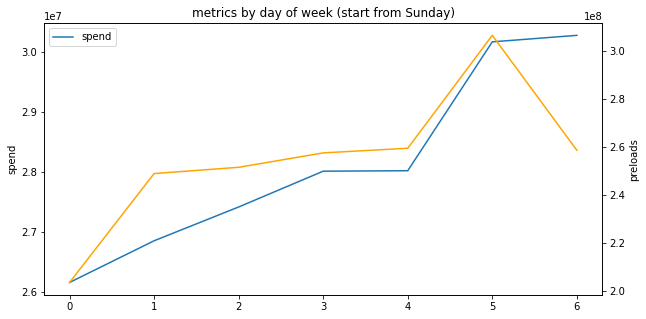

In [210]:
i = 'day_of_week'
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('metrics by day of week (start from Sunday)')
ax.plot(df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)['gross_rev'],label = 'spend')
ax2 = ax.twinx()
ax2.plot(df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)['preload'],color = 'orange',label = 'preloads')
ax.set_ylabel('spend')
ax2.set_ylabel('preloads')
ax.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdd09ddf3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdd09ddfb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdd09dc41f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd09da1220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd09da1550>],
 'means': []}

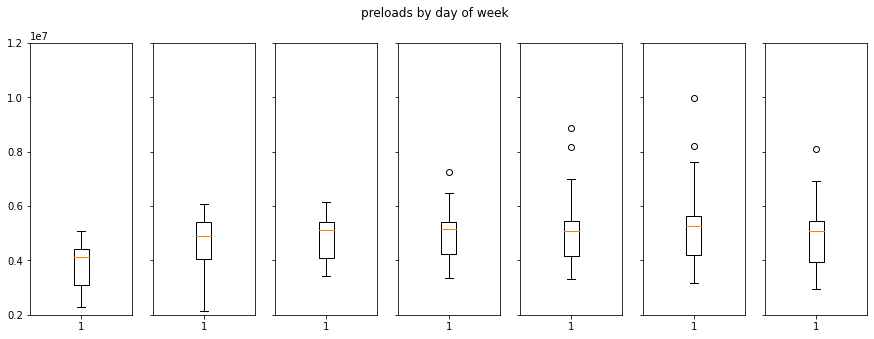

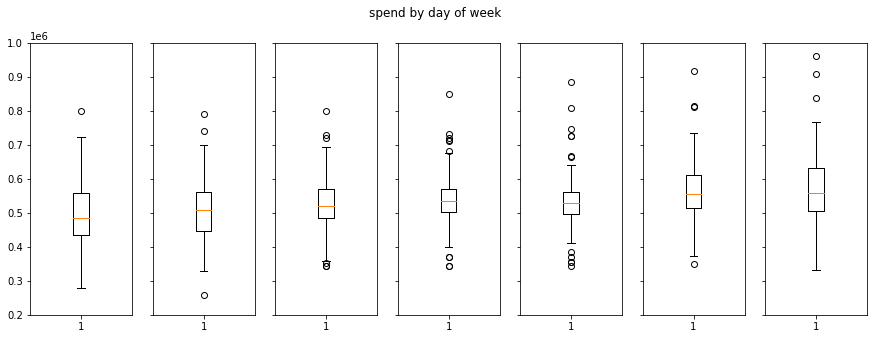

In [304]:
fig, ax = plt.subplots(1,7,figsize=[15,5], sharey=True)
fig.suptitle('preloads by day of week')
ax[0].set_ylim(2000000,12000000)
ax[0].boxplot(df[df.day_of_week==0].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'preload',aggfunc = np.sum))
ax[1].boxplot(df[df.day_of_week==1].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'preload',aggfunc = np.sum))
ax[2].boxplot(df[df.day_of_week==2].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'preload',aggfunc = np.sum))
ax[3].boxplot(df[df.day_of_week==3].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'preload',aggfunc = np.sum))
ax[4].boxplot(df[df.day_of_week==4].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'preload',aggfunc = np.sum))
ax[5].boxplot(df[df.day_of_week==5].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'preload',aggfunc = np.sum))
ax[6].boxplot(df[df.day_of_week==6].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'preload',aggfunc = np.sum))

fig, ax = plt.subplots(1,7,figsize=[15,5], sharey=True)
fig.suptitle('spend by day of week')
ax[0].set_ylim(200000,1000000)
ax[0].boxplot(df[df.day_of_week==0].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'gross_rev',aggfunc = np.sum))
ax[1].boxplot(df[df.day_of_week==1].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'gross_rev',aggfunc = np.sum))
ax[2].boxplot(df[df.day_of_week==2].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'gross_rev',aggfunc = np.sum))
ax[3].boxplot(df[df.day_of_week==3].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'gross_rev',aggfunc = np.sum))
ax[4].boxplot(df[df.day_of_week==4].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'gross_rev',aggfunc = np.sum))
ax[5].boxplot(df[df.day_of_week==5].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'gross_rev',aggfunc = np.sum))
ax[6].boxplot(df[df.day_of_week==6].pivot_table(index = df['event_timestamp'].dt.date, columns = 'day_of_week', values = 'gross_rev',aggfunc = np.sum))

<AxesSubplot:title={'center':'spike in house ad preloads on 10/9'}, xlabel='event_timestamp'>

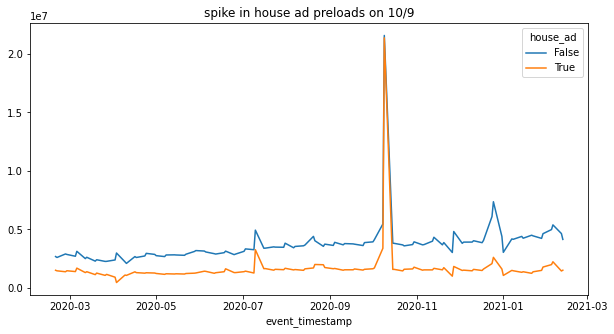

In [305]:
df[df.day_of_week.isin([4,5])].pivot_table(values = 'preload', index = df['event_timestamp'].dt.date, columns = 'house_ad', aggfunc = np.sum).plot(figsize=(10,5),title = 'spike in house ad preloads on 10/9')

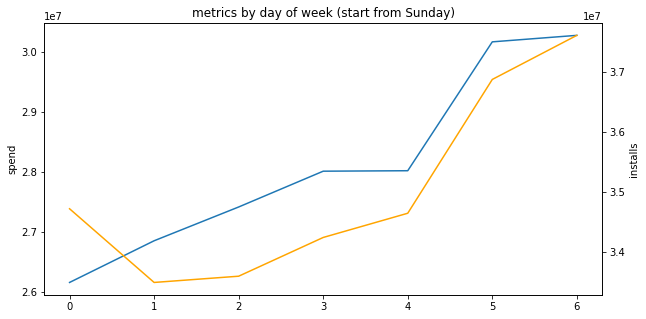

In [213]:
i = 'day_of_week'
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('metrics by day of week (start from Sunday)')
ax.plot(df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)['gross_rev'],label = 'spend')
ax2 = ax.twinx()
ax2.plot(df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)['install'],color = 'orange',label = 'installs')
ax.set_ylabel('spend')
ax2.set_ylabel('installs')
by_day = df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)

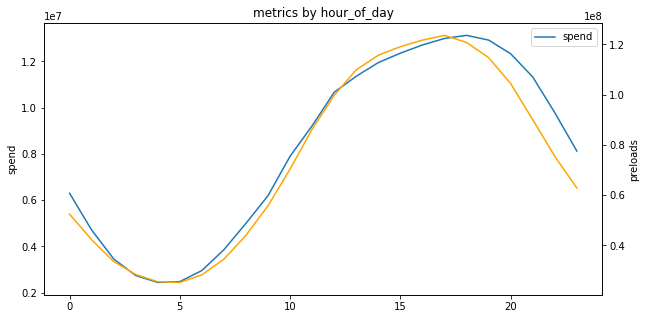

In [232]:
i = 'hour_of_day'
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('metrics by hour_of_day')
ax.plot(df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)['gross_rev'],label = 'spend')
ax2 = ax.twinx()
ax2.plot(df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)['preload'],color = 'orange',label = 'preloads')
ax.set_ylabel('spend')
ax2.set_ylabel('preloads')
ax.legend()
by_hour = df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)

<AxesSubplot:xlabel='hour_of_day'>

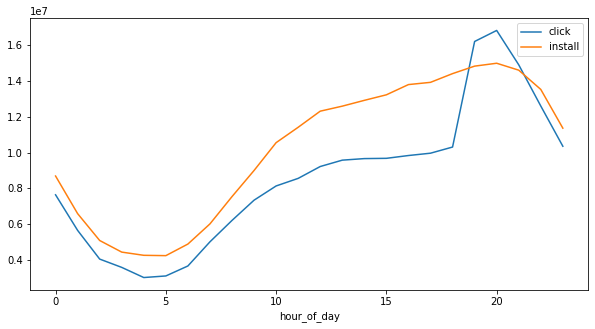

In [239]:
df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = i)[['click','install']].plot(figsize = [10,5])


In [240]:
df.pivot_table(values = ['click'], aggfunc = np.sum, index = i, columns = 'house_ad')

click       
house_ad        False  True 
hour_of_day                 
0             7631533   5816
1             5646383   4383
2             4044251   3309
3             3580326   2835
4             3013328   2703
5             3101467   3075
6             3658027   4118
7             5005816   5371
8             6200171   6442
9             7330819   6792
10            8125315   6746
11            8548840   6629
12            9200293  17448
13            9562134  11534
14            9643455  17044
15            9656051  19373
16            9811457  20540
17            9941978  20126
18           10257478  48687
19           16170054  32968
20           16789174  29957
21           14880138  20123
22           12584984  12169
23           10341381   8811

In [223]:
downstream = """
    select 
        f.install_timestamp
        , extract(hour from install_timestamp) as hour_of_day
        , extract(dow from install_timestamp) as day_of_week
        , sum(event_count) d7_events
        , sum(event_var_sum) d7_event_rev
        , d.billing_type_id
        , house_ad
        , d.pia_revenue_setting_via
    from venus.user_event_fact f
    join venus.campaign_dimension d 
        on f.campaign_id = d.campaign_id
    where
        date(f.install_timestamp) >= date('2020-02-15')
        and lower(event) similar to '%(purchase|revenue|sale|order)%'
        and datediff('day',install_timestamp,event_timestamp) <= 7
    group by
        1,2,3,6,7,8
    order by 1
"""

In [224]:
cur_olympus.execute(downstream)
df2 = pd.DataFrame(cur_olympus.fetchall(),columns = [c[0] for c in cur_olympus.description])
df2['d7_event_rev'] = df2['d7_event_rev'].astype('float')

In [225]:
i = 'day_of_week'
by_day2 = df2.pivot_table(values = ['d7_events','d7_event_rev'],aggfunc = np.sum, index = i)
by_day2

d7_event_rev  d7_events
day_of_week                         
0            2.481948e+06     328857
1            2.296802e+06     305380
2            2.658623e+06     320739
3            3.000975e+06     341024
4            2.671769e+06     346087
5            2.849878e+06     364985
6            3.950140e+06     374542

In [226]:
by_day_joined = by_day.join(by_day2)
by_day_joined['cpe'] = by_day_joined['gross_rev']/by_day_joined['d7_events']
by_day_joined['roas'] = by_day_joined['d7_event_rev']/by_day_joined['gross_rev']
by_day_joined

click    gross_rev   install    preload  d7_event_rev  \
day_of_week                                                             
0            30347094  26153256.13  34715004  203376652  2.481948e+06   
1            29496597  26847995.78  33485410  248738762  2.296802e+06   
2            28932334  27411190.89  33589528  251343725  2.658623e+06   
3            28627532  28007921.89  34235966  257346752  3.000975e+06   
4            28653608  28015724.64  34640214  259285741  2.671769e+06   
5            29352036  30164097.86  36872934  306310533  2.849878e+06   
6            29632651  30272331.54  37608680  258442907  3.950140e+06   

             d7_events        cpe      roas  
day_of_week                                  
0               328857  79.527746  0.094900  
1               305380  87.916680  0.085548  
2               320739  85.462606  0.096990  
3               341024  82.128888  0.107147  
4               346087  80.949948  0.095367  
5               364985  82.644760  0.094479  
6               374542  80.824932  0.130487

Text(0, 0.5, 'event_rev')

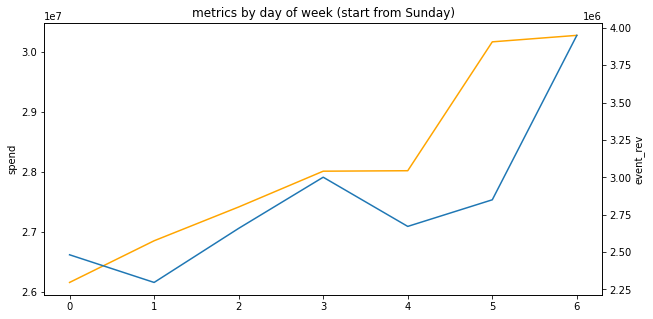

In [306]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('metrics by day of week (start from Sunday)')
ax.plot(by_day_joined['gross_rev'],color = 'orange')
ax2 = ax.twinx()
ax2.plot(by_day_joined['d7_event_rev'])
ax.set_ylabel('spend')
ax2.set_ylabel('event_rev')

Text(0, 0.5, 'events')

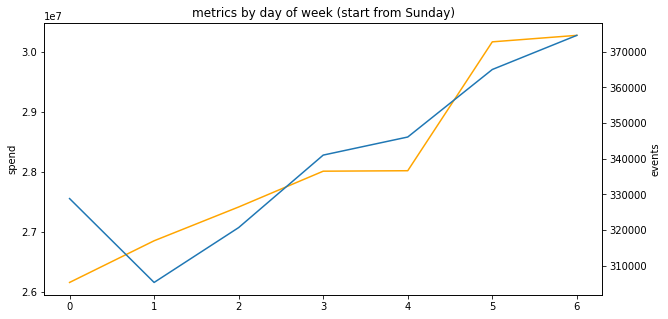

In [307]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('metrics by day of week (start from Sunday)')
ax.plot(by_day_joined['gross_rev'],color = 'orange')
ax2 = ax.twinx()
ax2.plot(by_day_joined['d7_events'])
ax.set_ylabel('spend')
ax2.set_ylabel('events')

In [228]:
i = 'hour_of_day'
by_hour2 = df2.pivot_table(values = ['d7_events','d7_event_rev'],aggfunc = np.sum, index = i)
by_hour2

d7_event_rev  d7_events
hour_of_day                         
0            7.660424e+05      80088
1            5.583794e+05      59813
2            5.004801e+05      45948
3            3.929328e+05      38322
4            3.752439e+05      35655
5            3.112383e+05      37770
6            6.282407e+05      44436
7            4.289645e+05      55795
8            5.342864e+05      70943
9            6.522660e+05      88927
10           8.098491e+05     107032
11           8.948769e+05     117492
12           7.998938e+05     115552
13           8.009631e+05     115754
14           9.145092e+05     118120
15           1.056097e+06     123506
16           1.539286e+06     129836
17           1.297713e+06     151140
18           1.280156e+06     167518
19           1.142949e+06     164981
20           1.131122e+06     154913
21           1.091711e+06     143060
22           9.631180e+05     118491
23           1.039815e+06      96522

In [229]:
by_hour_joined = by_hour.join(by_hour2)
by_hour_joined['cpe'] = by_hour_joined['gross_rev']/by_hour_joined['d7_events']
by_hour_joined['roas'] = by_hour_joined['d7_event_rev']/by_hour_joined['gross_rev']
by_hour_joined

click    gross_rev   install    preload  d7_event_rev  \
hour_of_day                                                             
0             7637349   6296947.26   8687024   52461838  7.660424e+05   
1             5650766   4705605.05   6586427   42297767  5.583794e+05   
2             4047560   3455968.40   5085666   33605907  5.004801e+05   
3             3583161   2735890.85   4436740   28463205  3.929328e+05   
4             3016031   2437097.24   4257826   25585574  3.752439e+05   
5             3104542   2473946.85   4238856   25298718  3.112383e+05   
6             3662145   2953064.89   4886947   28330173  6.282407e+05   
7             5011187   3856062.47   6012761   34580380  4.289645e+05   
8             6206613   4997083.94   7537692   44067319  5.342864e+05   
9             7337611   6194307.79   8996840   55834407  6.522660e+05   
10            8132061   7899432.61  10550883   70391483  8.098491e+05   
11            8555469   9216856.05  11410154   86247995  8.948769e+05   
12            9217741  10665933.58  12309879   99700159  7.998938e+05   
13            9573668  11360056.05  12590309  109874266  8.009631e+05   
14            9660499  11949539.77  12914420  115649480  9.145092e+05   
15            9675424  12357511.72  13224111  119055499  1.056097e+06   
16            9831997  12712231.14  13795267  121677855  1.539286e+06   
17            9962104  12992676.73  13919966  123558707  1.297713e+06   
18           10306165  13127636.48  14407559  120716694  1.280156e+06   
19           16203022  12923532.87  14825485  114711635  1.142949e+06   
20           16819131  12330811.13  14987177  104365199  1.131122e+06   
21           14900261  11326268.00  14600398   90050206  1.091711e+06   
22           12597153   9782071.50  13524792   75474264  9.631180e+05   
23           10350192   8121986.36  11360557   62846342  1.039815e+06   

             d7_events         cpe      roas  
hour_of_day                                   
0                80088   78.625353  0.121653  
1                59813   78.671945  0.118663  
2                45948   75.214773  0.144816  
3                38322   71.392173  0.143622  
4                35655   68.352187  0.153972  
5                37770   65.500314  0.125806  
6                44436   66.456587  0.212742  
7                55795   69.111255  0.111244  
8                70943   70.438013  0.106920  
9                88927   69.656098  0.105301  
10              107032   73.804401  0.102520  
11              117492   78.446669  0.097091  
12              115552   92.304188  0.074995  
13              115754   98.139641  0.070507  
14              118120  101.164407  0.076531  
15              123506  100.055963  0.085462  
16              129836   97.909911  0.121087  
17              151140   85.964515  0.099880  
18              167518   78.365528  0.097516  
19              164981   78.333462  0.088439  
20              154913   79.598298  0.091731  
21              143060   79.171453  0.096388  
22              118491   82.555397  0.098457  
23               96522   84.146478  0.128025

Text(0, 0.5, 'event_rev')

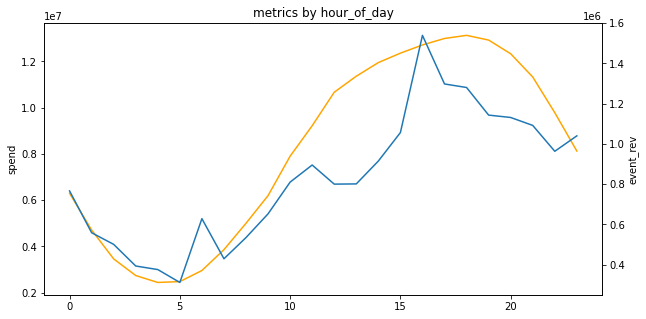

In [301]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('metrics by hour_of_day')
ax.plot(by_hour_joined['gross_rev'],color = 'orange')
ax2 = ax.twinx()
ax2.plot(by_hour_joined['d7_event_rev'])
ax.set_ylabel('spend')
ax2.set_ylabel('event_rev')

Text(0, 0.5, 'events')

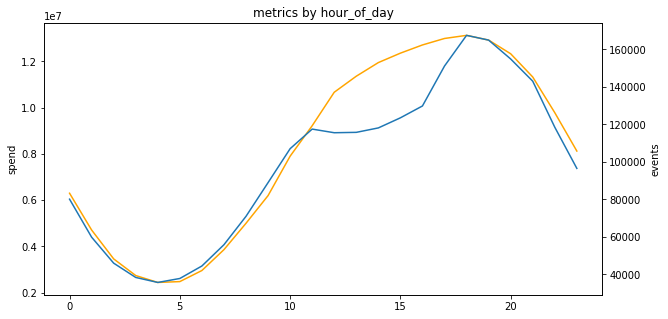

In [302]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('metrics by hour_of_day')
ax.plot(by_hour_joined['gross_rev'],color = 'orange')
ax2 = ax.twinx()
ax2.plot(by_hour_joined['d7_events'])
ax.set_ylabel('spend')
ax2.set_ylabel('events')

In [296]:
by_hour_billing = df.pivot_table(values = ['click','preload','install','gross_rev'], aggfunc = np.sum, index = ('hour_of_day','billing_type_id'))
by_hour_billing2 = df2.pivot_table(values = ['d7_events','d7_event_rev'],aggfunc = np.sum, index = ('hour_of_day','billing_type_id'))
by_hour_billing_joined = by_hour_billing.join(by_hour_billing2)
by_hour_billing_cpp = by_hour_billing_joined.loc[pd.IndexSlice[:, 1], :].set_index(by_hour_billing_joined.loc[pd.IndexSlice[:, 1], :].index.get_level_values(0))
by_hour_billing_cpi = by_hour_billing_joined.loc[pd.IndexSlice[:, 2], :].set_index(by_hour_billing_joined.loc[pd.IndexSlice[:, 2], :].index.get_level_values(0))
by_hour_billing_cpp

click   gross_rev   install   preload  d7_event_rev  d7_events
hour_of_day                                                                  
0            3609673  4693293.96   6629874  35668754  7.468779e+05    64292.0
1            2580619  3447927.76   4959881  29024740  5.442532e+05    48280.0
2            1728830  2528270.87   3821180  23238320  4.910611e+05    37346.0
3            1411916  1992888.29   3411070  19669558  3.861585e+05    31693.0
4            1264345  1786156.61   3355450  17576705  3.682169e+05    29886.0
5            1369120  1841543.50   3334826  17318541  2.985525e+05    31968.0
6            1718871  2246108.47   3872277  19411555  6.155982e+05    37660.0
7            2341435  2966660.84   4772583  23513484  4.142594e+05    47260.0
8            2949780  3801142.60   5989655  29854972  5.080976e+05    58387.0
9            3434908  4542341.89   7162665  37251611  6.209082e+05    74655.0
10           3933856  5496941.76   8430462  45268136  7.743077e+05    89359.0
11           4166330  5904237.94   9059354  53747813  8.610413e+05    98075.0
12           4553832  6699595.60   9699406  61402490  7.606095e+05    95467.0
13           4787403  6969254.86   9811927  67561729  7.688655e+05    95149.0
14           4845699  7323001.70   9994844  71010125  8.776473e+05    95954.0
15           4799277  7660809.69  10176516  73289247  1.022108e+06    99715.0
16           4874847  7988103.57  10626890  75284756  1.499569e+06   107178.0
17           4995392  8309759.85  10712893  77215862  1.250928e+06   127397.0
18           5169857  8699707.06  11090561  76156209  1.230922e+06   142022.0
19           9270634  8995405.33  11436369  74164978  1.099112e+06   139899.0
20           9371148  9045950.02  11641513  69197944  1.088598e+06   130616.0
21           7986296  8717089.39  11344194  60834578  1.060041e+06   119001.0
22           6582709  7775523.80  10578290  51834696  9.329872e+05    96881.0
23           5145903  6621842.14   8818951  43960824  1.010968e+06    77738.0

Text(0, 0.5, 'event_rev')

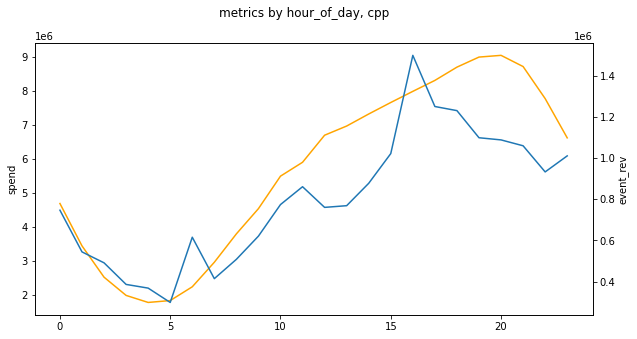

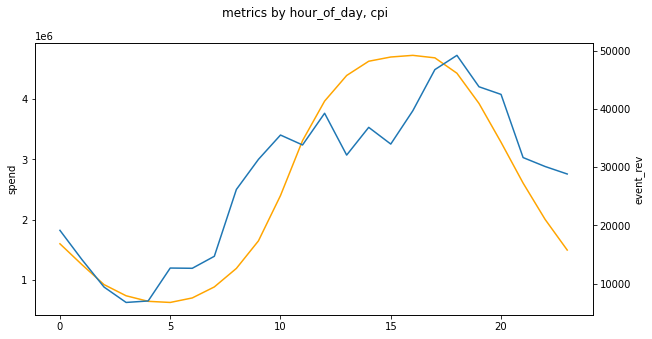

In [300]:
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('metrics by hour_of_day, cpp')
ax.plot(by_hour_billing_cpp['gross_rev'], color = 'orange')
ax2 = ax.twinx()
ax2.plot(by_hour_billing_cpp['d7_event_rev'])
ax.set_ylabel('spend')
ax2.set_ylabel('event_rev')

fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('metrics by hour_of_day, cpi')
ax.plot(by_hour_billing_cpi['gross_rev'], color = 'orange')
ax2 = ax.twinx()
ax2.plot(by_hour_billing_cpi['d7_event_rev'])
ax.set_ylabel('spend')
ax2.set_ylabel('event_rev')